In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('CSV/cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.isnull().any().sum()

0

In [5]:
df['gender']=df['gender'].replace(1,'Male')

In [6]:
df['gender']=df['gender'].replace(2,'Female')

In [7]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,Male,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='gender', ylabel='count'>

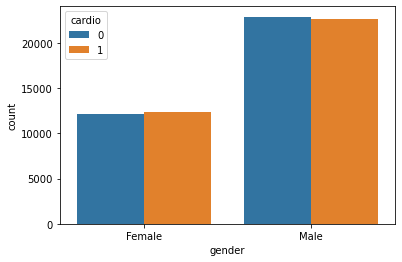

In [8]:
sns.countplot(x='gender',hue='cardio',data=df)

In [9]:
card=df[df.cardio==1].shape[0]

In [10]:
sum_v=sum(df['cardio'].value_counts())

In [11]:
card_per=(card/sum_v)*100

In [12]:
card_per

49.97

In [13]:
Lab=LabelEncoder()

In [14]:
k_range=range(1,12)

In [15]:
wcss=[]

In [16]:
for i in k_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['height','weight']])
    wcss.append(kmeans.inertia_)

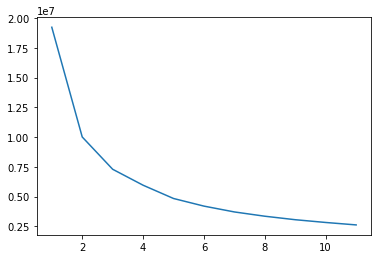

In [17]:
plt.plot(k_range,wcss)

In [18]:
kmeans=KMeans(n_clusters=5)

In [19]:
kmeans.fit(df[['height','weight']])

KMeans(n_clusters=5)

In [20]:
pd.DataFrame(kmeans.cluster_centers_,columns=['First','Second'])

,First,Second
0,167.819069,68.714997
1,167.019490,106.132951
2,157.609413,58.943530
3,172.558110,84.751724
4,157.795001,79.749309


In [21]:
ndf=pd.DataFrame()
ndf['height']=df['height']
ndf['weight']=df['weight']
ndf['cluster']=kmeans.labels_

In [22]:
ndf['cluster'].value_counts()

0    22641
2    16618
4    12722
3    12486
1     5533
Name: cluster, dtype: int64

<AxesSubplot:xlabel='weight', ylabel='height'>

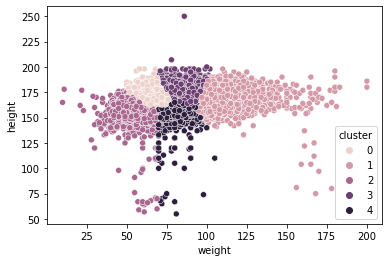

In [23]:
sns.scatterplot(x='weight',y='height',hue='cluster',data=ndf)

In [24]:
Lab=LabelEncoder()

In [25]:
df['gender']=Lab.fit_transform(df['gender'])
df=df.drop(['id'],axis=1)

In [26]:
x=df.drop(['cardio'],axis=1)

In [27]:
y=df['cardio']

In [28]:
feature=SelectKBest()

In [29]:
feature.fit(x,y)

SelectKBest()

In [30]:
top=pd.Series(feature.scores_,index=x.columns).nlargest(1).keys().item()

In [31]:
meanvlu=df[top].mean()

In [32]:
std_val=df[top].std()

In [33]:
std_3=meanvlu+(2*std_val)

In [34]:
neg_std_3=meanvlu-(2*std_val)

In [35]:
df=df[(df[top]>neg_std_3)&(df[top]<std_3)]

In [36]:
df.shape

(68792, 12)

In [37]:
x=df.drop(['cardio'],axis=1)

In [38]:
y=df['cardio']

In [39]:
feature.fit(x,y)

SelectKBest()

In [40]:
topper=list(pd.Series(feature.scores_,index=x.columns).nlargest(8).keys())

In [41]:
x=df[topper]
y=df['cardio']

In [42]:
Scaler=MinMaxScaler(feature_range=(0,1))

In [43]:
ft=Scaler.fit_transform(x)

In [44]:
Extra=ExtraTreesClassifier(n_estimators=5)

In [45]:
Extra.fit(ft,y)

ExtraTreesClassifier(n_estimators=5)

<AxesSubplot:>

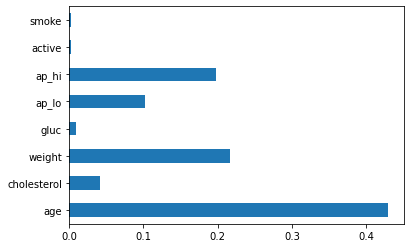

In [46]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

In [47]:
Extra=ExtraTreesClassifier(n_estimators=5)
Forest=RandomForestClassifier(n_estimators=5)
Tree=DecisionTreeClassifier()
Logi=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=450)
Support=SVC(gamma='auto')
MNB=MultinomialNB()
GNB=GaussianNB()
BNB=BernoulliNB()

In [48]:
tools=[Extra,Forest,Tree,Logi,KNN,MNB,GNB,BNB,BNB]

In [49]:
lis=[]
for i in tools:
    cv_score=cross_val_score(i,ft,y,cv=3)
    lis.append(cv_score.mean())

In [50]:
K=tools[lis.index(max(lis))]

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(ft,y,test_size=0.2,random_state=1)

In [52]:
K.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=5)

In [53]:
K.score(xtest,ytest)

0.6741042226906026

In [54]:
pred=K.predict(xtest)

In [55]:
confusion_matrix(ytest,pred)

array([[4492, 2267],
       [2217, 4783]], dtype=int64)

In [56]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      6759
           1       0.68      0.68      0.68      7000

    accuracy                           0.67     13759
   macro avg       0.67      0.67      0.67     13759
weighted avg       0.67      0.67      0.67     13759



In [57]:
accuracy_score(ytest,pred)

0.6741042226906026

In [58]:
accept=pd.DataFrame(K.predict_proba(ft),columns=['First','Second'])

In [59]:
acp=[]
for i in K.predict_proba(ft):
    acp.append(max(i))

In [60]:
accept['Accepted']=acp

In [61]:
accept

,First,Second,Accepted
0,1.0,0.0,1.0
1,0.0,1.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,1.0,0.0,1.0
...,...,...,...
68787,1.0,0.0,1.0
68788,0.0,1.0,1.0
68789,0.2,0.8,0.8
68790,0.0,1.0,1.0


In [62]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,0,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,0,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,0,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,0,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='height', ylabel='Count'>

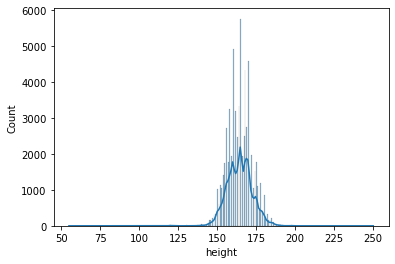

In [63]:
sns.histplot(df['height'],kde=True)

In [64]:
Support.fit(xtrain,ytrain)

SVC(gamma='auto')

In [65]:
Support.score(xtest,ytest)

0.6449596627661894